# Zadanie 6.4: Klasyfikacja punktów w 3D
Zadanie polega na zbudowaniu modelu klasyfikacyjnego typu MLP (Multi-Layer Perceptron, czyli wielowarstwowa sieć neuronowa), który nauczy się odróżniać, czy punkt w przestrzeni 3D znajduje się wewnątrz, czy na zewnątrz sfery o promieniu 0.7.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


### Komórka 2: Generowanie i wizualizacja danych
Dane zgodnie z instrukcją. Następnie wykres 3D, aby zobaczyć, jak rozkładają się dane. Wizualizacja jest kluczowa, aby zrozumieć problem – inaczej zobaczyć punkty tworzące kulę (klasa 0) wewnątrz sześcianu wypełnionego punktami drugiej klasy (klasa 1).

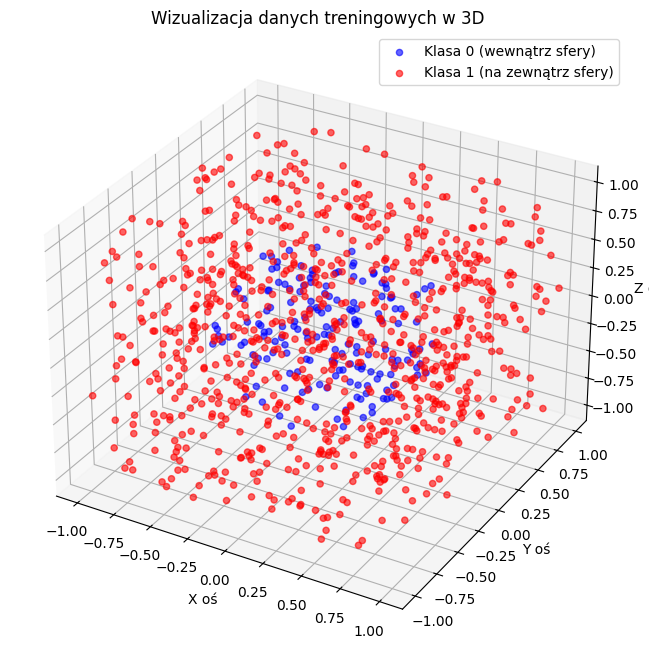

In [2]:
# Generowanie danych zgodnie z instrukcją
np.random.seed(42)
X = np.random.uniform(-1, 1, (1000, 3))
# Klasa 0: wewnątrz sfery (norma <= 0.7), Klasa 1: na zewnątrz sfery (norma > 0.7)
y = (np.linalg.norm(X, axis=1) > 0.7).astype(int)

# Wizualizacja danych w 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Punkty wewnątrz sfery (klasa 0)
ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], label='Klasa 0 (wewnątrz sfery)', c='blue', alpha=0.6)
# Punkty na zewnątrz sfery (klasa 1)
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], label='Klasa 1 (na zewnątrz sfery)', c='red', alpha=0.6)

ax.set_title('Wizualizacja danych treningowych w 3D')
ax.set_xlabel('X oś')
ax.set_ylabel('Y oś')
ax.set_zlabel('Z oś')
ax.legend()
plt.show()

### Komórka 3: Przygotowanie danych do treningu
Dane podzielić na zbiór treningowy i testowy. Następnie przeskalować cechy (współrzędne x, y, z) za pomocą StandardScaler. Chociaż dane są już w podobnym zakresie [-1, 1], standaryzacja (przeskalowanie do średniej 0 i odchylenia standardowego 1) jest standardową dobrą praktyką, która stabilizuje i przyspiesza proces uczenia sieci neuronowych.

In [3]:
# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Skalowanie cech
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Komórka 4: Budowa modelu MLP
Definiujemy architekturę sieci neuronowej. Dla tego problemu wystarczy prosta sieć:
Warstwa wejściowa (Input) przyjmująca 3 cechy.
Dwie gęste warstwy ukryte z popularną funkcją aktywacji relu.
Warstwa wyjściowa z jednym neuronem i funkcją aktywacji sigmoid, idealną do klasyfikacji binarnej (zwraca prawdopodobieństwo przynależności do klasy 1).

In [4]:
# Budowa modelu MLP (Multi-Layer Perceptron)
model = Sequential([
    Input(shape=(3,)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid') # Warstwa wyjściowa dla klasyfikacji binarnej
])

# Wyświetlenie podsumowania architektury
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

### Komórka 5 i 6: Kompilacja modelu i trening

In [5]:
# Kompilacja modelu
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Trening modelu
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50, # Liczba epok do treningu
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    verbose=1
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7350 - loss: 0.6408 - val_accuracy: 0.7850 - val_loss: 0.6067
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8087 - loss: 0.5835 - val_accuracy: 0.8300 - val_loss: 0.5501
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8300 - loss: 0.5283 - val_accuracy: 0.8300 - val_loss: 0.4944
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8300 - loss: 0.4765 - val_accuracy: 0.8300 - val_loss: 0.4462
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8300 - loss: 0.4354 - val_accuracy: 0.8300 - val_loss: 0.4103
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8300 - loss: 0.4062 - val_accuracy: 0.8300 - val_loss: 0.3905
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8300 - loss: 0.3888 - val_accuracy: 0.8300 - val_loss: 0.3789
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8300 - loss: 0.3782 - val_accuracy: 0.8300 - val_loss:

### Komórka 7: Ocena modelu
Po zakończeniu treningu należy sprawdzić ostateczną wydajność modelu na zbiorze testowym. Oczekiwana wysoka dokładność, ponieważ granica decyzyjna (sfera) jest gładka i dobrze zdefiniowana.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9600 - loss: 0.1022 

Dokładność modelu na zbiorze testowym: 96.00%
Strata na zbiorze testowym: 0.1022


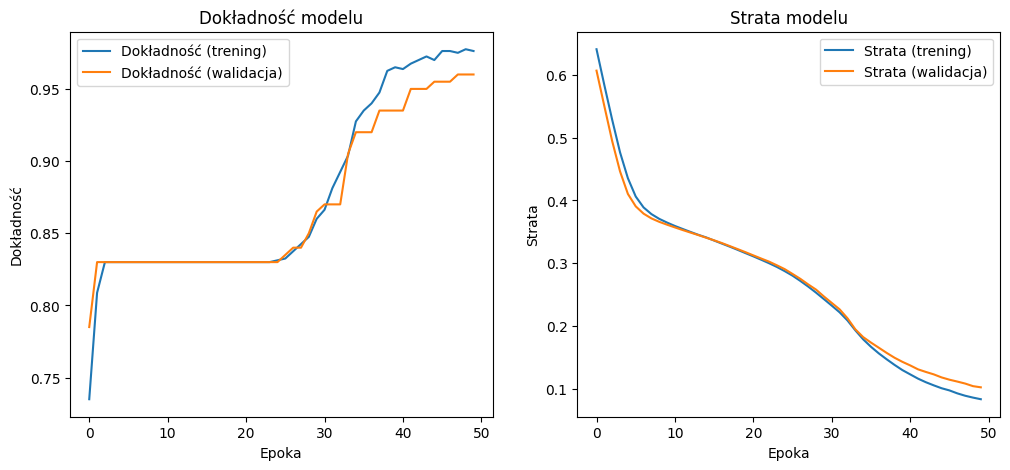

In [7]:
# Ocena modelu na danych testowych
loss, accuracy = model.evaluate(X_test_scaled, y_test)

print(f"\nDokładność modelu na zbiorze testowym: {accuracy * 100:.2f}%")
print(f"Strata na zbiorze testowym: {loss:.4f}")

# Wykres dokładności i straty w trakcie treningu
plt.figure(figsize=(12, 5))

# Wykres dokładności
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Dokładność (trening)')
plt.plot(history.history['val_accuracy'], label='Dokładność (walidacja)')
plt.title('Dokładność modelu')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()

# Wykres straty
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Strata (trening)')
plt.plot(history.history['val_loss'], label='Strata (walidacja)')
plt.title('Strata modelu')
plt.xlabel('Epoka')
plt.ylabel('Strata')
plt.legend()

plt.show()